<a href="https://colab.research.google.com/github/wolfzxcv/ml-examples/blob/master/ML_irisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


**Load the Data**

In [2]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal-length','sepal-width', 'petal-length','petal-width','class']
dataset=read_csv(url, names=names)

**Explore the Data**

In [3]:
print ('Input and Output Sizes: ')
print (dataset.shape)

print ('Peek into the data')
print (dataset.head())

print ('\n\nStatistical Information:')
print (dataset.describe())

print ('\n\nClass Distribution')
print (dataset.groupby('class').size())

Input and Output Sizes: 
(150, 5)
Peek into the data
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Statistical Information:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.

**Data Visualizations**

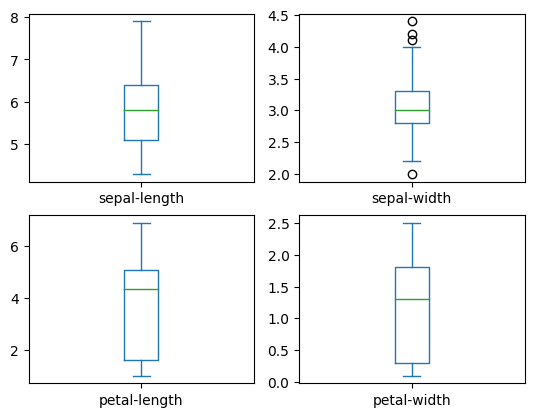

In [4]:
dataset.plot(kind='box', subplots=True, layout=(2,2))
plt.show()

**Train**

In [5]:
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

**Build and Test the Model**

In [6]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions=model.predict(X_validation)

print ('accuracy: ')
print (accuracy_score(Y_validation, predictions))

print ('\n\nConfusion Matrix:')
print (confusion_matrix(Y_validation, predictions))


print ('\n\nClassification Report')
print (classification_report(Y_validation, predictions))

accuracy: 
0.9666666666666667


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Comparing Multiple Models**

In [7]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Support Vector', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


results=[]
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


Logistic Regression: 0.941667 (0.065085)
Support Vector: 0.966667 (0.040825)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
